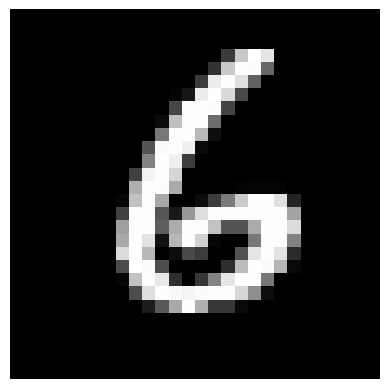

In [5]:
#과제1
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the MNIST dataset as an example
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0
# 이미지 데이터 형식이 올바른지 확인하세요.
# train_image[6000] 표시
# 确保图像数据格式正确
# 显示train_image[6000]
plt.imshow(train_images[6000], cmap='gray') # Use train_images instead of train_image
plt.axis('off')  # 关闭坐标轴 #축 끄기
plt.show()  # 弹出窗口显示图像
# 팝업 창에 이미지 표시

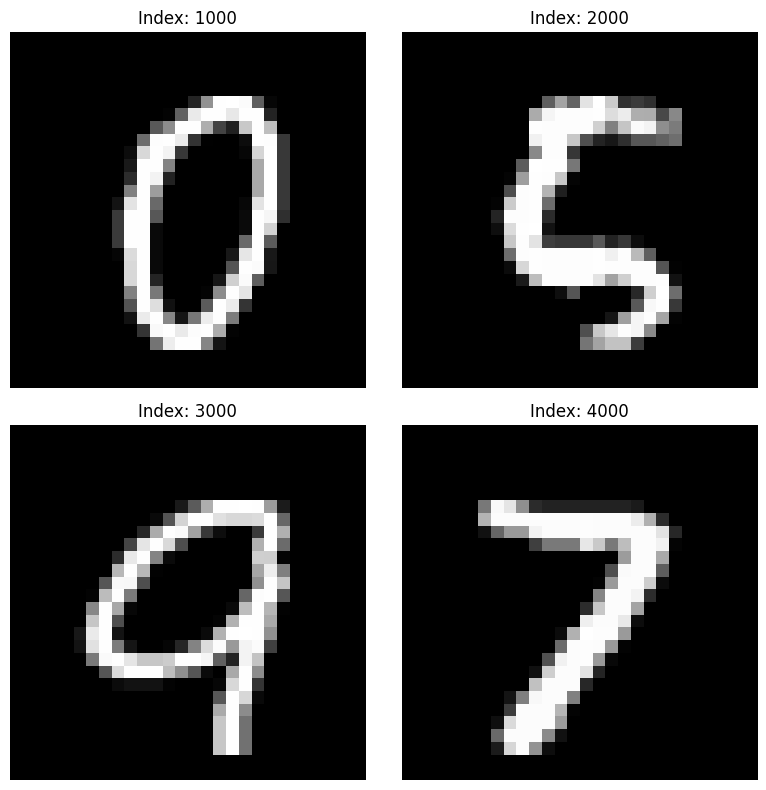

In [8]:
#과제2
import matplotlib.pyplot as plt
# 创建2行2列的子图布局，设置figsize调整整体大小 # 2x2 서브플롯 레이아웃을 만들고 figsize를 사용하여 전체 크기를 조정합니다.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# Flatten the 2x2 array of axes into a 1D array of 4 axes
ax1, ax2, ax3, ax4 = axs.flatten()
# 分别在4个子图中显示图像 # 4개의 하위 플롯 각각에 이미지를 표시합니다.
ax1.imshow(train_images[1000], cmap='gray') # Corrected from train_image
ax1.set_title('Index: 1000')  # 添加标题标注索引 # 제목 주석 인덱스 추가
ax1.axis('off')  # 关闭坐标轴 # 축을 닫습니다
ax2.imshow(train_images[2000], cmap='gray')
ax2.set_title('Index: 2000')
ax2.axis('off')
ax3.imshow(train_images[3000], cmap='gray')
ax3.set_title('Index: 3000')
ax3.axis('off')
ax4.imshow(train_images[4000], cmap='gray')
ax4.set_title('Index: 4000')
ax4.axis('off')
plt.tight_layout()  # 自动调整子图间距，避免标题重叠 제목이 겹치지 않도록 하위 이미지 간격을 자동으로 조정합니다.
plt.show()  # 显示整体图像 전체 이미지 표시

In [13]:
#과제3
model = Sequential([
    Flatten(input_shape=(28, 28)),  # 展平输入层 입력 레이어를 평평하게 만들기
    Dense(128, activation='relu'),  # 隐藏层：128个节点（原为256） 은닉층: ​​128개 노드(원래 256개)
    Dense(10, activation='softmax')  # 输出层（10分类任务） 출력 계층(10가지 작업 범주)
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#과제4
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(28,28)),
    #连接输入层与全连接层 입력 계층과 완전 연결 계층을 연결합니다.
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    #将输出值转换为概率分布（所有类别概率之和=1），便于分类 # 더 쉽게 분류할 수 있도록 출력 값을 확률 분포(모든 범주에 대한 확률의 합 = 1)로 변환합니다.
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    #通过反向传播更新权重，最小化损失函数 가중치는 역전파를 통해 업데이트되고 손실 함수는 최소화됩니다.
    optimizer=keras.optimizers.SGD(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

print("compiled with SGD")


compiled with SGD


In [17]:
#과제5
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
# 1. 加载并预处理数据 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 归一化至[0,1] [0,1]로 정규화
# 2. 定义模型构建函数 모델 구축 기능 정의
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # 展平图像为784维向量 평면화된 이미지는 784차원 벡터입니다.
        Dense(128, activation='relu'),  # 隐藏层：128个神经元 은닉층: ​​128개 뉴런
        Dense(10, activation='softmax')  # 输出层：10个类别（0-9） 출력 레이어: 10개 카테고리(0-9)
    ])
    model.compile(
        optimizer=SGD(learning_rate=0.01, momentum=0.9),  # SGD优化器 SGD 옵티마이저
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']  # 使用准确率作为评估指标 정확도를 평가 지표로 사용
    )
    return model
# 模型1：epochs=2
model_2 = build_model()
history_2 = model_2.fit(
    x_train, y_train,
    epochs=2,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=0  # 静默模式，不输出训练过程
)
# 模型2：epochs=5
model_5 = build_model()
history_5 = model_5.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=0
)
# 4. 提取并对比准确率 정확도 추출 및 비교
acc_train_2 = history_2.history['accuracy'][-1]
acc_test_2 = history_2.history['val_accuracy'][-1]
acc_train_5 = history_5.history['accuracy'][-1]
acc_test_5 = history_5.history['val_accuracy'][-1]
# 5. 打印结果 결과 인쇄
print("=== epochs=2 vs epochs=5 准确率对比 ===")
print(f"epochs=2: 训练集准确率 = {acc_train_2:.4f} ({acc_train_2*100:.2f}%), 测试集准确率 = {acc_test_2:.4f} ({acc_test_2*100:.2f}%)")
print(f"epochs=5: 训练集准确率 = {acc_train_5:.4f} ({acc_train_5*100:.2f}%), 测试集准确率 = {acc_test_5:.4f} ({acc_test_5*100:.2f}%)")

#epochs=2时模型训练不充分，epochs=5时权重参数通过更多迭代优化，更接近数据的真实规律
#epochs=2일 때, 모델 학습이 충분하지 않습니다. epochs=5일 때, 가중치 매개변수는 더 많은 반복을 통해 최적화되므로 데이터의 실제 패턴에 더욱 근접합니다.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


=== epochs=2 vs epochs=5 准确率对比 ===
epochs=2: 训练集准确率 = 0.9574 (95.74%), 测试集准确率 = 0.9657 (96.57%)
epochs=5: 训练集准确率 = 0.9799 (97.99%), 测试集准确率 = 0.9748 (97.48%)
